For Iris


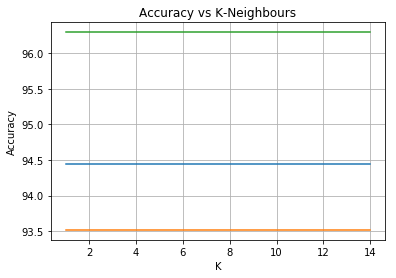

For Robo1


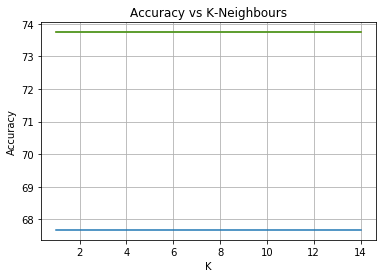

For Robo2


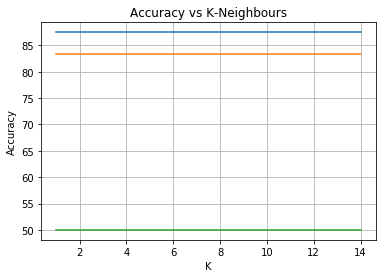

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# def dist(row1, row2):
#     distance = 0
#     for i in range(0,len(row1)-1):
#         distance += np.absolute(np.square(row1[i])-np.square(row2[i]))
#     return distance

def euclid(arr_train,arr_test):
    result=0
    for i in range(len(arr_train)-1):
        temp = (arr_train[i]-arr_test[i])**2
        result += temp
    return np.sqrt(result)

def manhattan(arr_train,arr_test):
    result = 0 
    for i in range(len(arr_train)-1):
        temp = arr_train[i] - arr_test[i]
        temp = np.abs(temp)
        result+=temp
    return result

def chebyshev(arr_train,arr_test):
    result = abs(arr_train[0]-arr_test[0])
    for i in range(1,len(arr_train)-1):
        temp = arr_train[i] - arr_test[i]
        temp = abs(temp)
        result=max(temp,result)
    return result

def predict(row, df, k, func):
    pairs = []
    for index,row_test in df.iterrows():
        distance = func(row, row_test)
        pair = (distance, row_test[len(row_test)-1])
        pairs.append(pair)
    pairs.sort()
    firstk = []
    for i in range(0,int(k)):
        firstk.append(pairs[i][1])
    d_mem_count = Counter(firstk)
    # print(d_mem_count)
    # Counter({'a': 2, 'b': 2, 'c': 1})
    return list(d_mem_count.keys())[0]

def KNN(df_train, df_test, k, func):
    correct, wrong = 0,0
    for index,row in df_test.iterrows():
        prediction = predict(row, df_train, k, func)
        # prediction = 1
        # print(row[len(row)-1])
        if prediction == row[len(row)-1]:
            correct += 1
        else:
            wrong += 1
#     print("correct = {} wrong = {}".format(correct,wrong))
#     accuracy = 0
    accuracy = correct/(wrong+correct)
#     print("Accuracy : %0.2f" %(accuracy*100),"%")
    return accuracy*100

def main():
    data_frame = pd.read_csv('Iris/Iris.csv', header=None)
    data_frame.iloc[:,4] = pd.factorize(data_frame.iloc[:,4])[0]
    # print(data_frame.head(20))
    
#     k = np.floor(np.sqrt(len(data_frame)))
    df_train = data_frame.sample(frac = 0.2)
    df_test = data_frame.drop(df_train.index)
    k = range(1, 15, 1)

    print("For Iris")
    AcE = [KNN(df_train, df_test, i, euclid) for i in k]
    AcM = [KNN(df_train, df_test, i, manhattan) for i in k]
    AcC = [KNN(df_train, df_test, i, chebyshev) for i in k]
    plt.plot(k, AcE,label="Euclidean Distance")
    plt.plot(k, AcM,label="Manhatan")
    plt.plot(k, AcC,label="Chebyshev")
    plt.title('Accuracy vs K-Neighbours')
    plt.grid(True)
    plt.ylabel('Accuracy')
    plt.xlabel('K')
    plt.show()

    data_frame = pd.read_csv('RobotDataset/Robot1', header=None, sep = ' ')
    
    data_frame = data_frame.drop(data_frame.columns[[0, 7, 8]], axis=1)
    cols = data_frame.columns.tolist()
    cols = [cols[-1]] + cols[1:5] + [cols[0]]
    data_frame = data_frame[cols]
    data_frame.columns = range(data_frame.shape[1])
    # print(data_frame.head(20))

#     k = np.floor(np.sqrt(len(data_frame)))
    df_train = data_frame.sample(frac = 0.2)
    df_test = data_frame.drop(df_train.index)

    print("For Robo1")
    AcE = [KNN(df_train, df_test, i, euclid) for i in k]
    AcM = [KNN(df_train, df_test, i, manhattan) for i in k]
    AcC = [KNN(df_train, df_test, i, chebyshev) for i in k]
    plt.plot(k, AcE,label="Euclidean Distance")
    plt.plot(k, AcM,label="Manhatan")
    plt.plot(k, AcC,label="Chebyshev")
    plt.title('Accuracy vs K-Neighbours')
    plt.grid(True)
    plt.ylabel('Accuracy')
    plt.xlabel('K')
    plt.show()

    data_frame = pd.read_csv('RobotDataset/Robot2', header=None, sep = ' ')


    data_frame = data_frame.drop(data_frame.columns[[0, 8]], axis=1)
    cols = data_frame.columns.tolist()
    cols = [cols[-1]] + cols[1:6] + [cols[0]]
    data_frame = data_frame[cols]
    data_frame.columns = range(data_frame.shape[1])
    # print(data_frame.head(40))

#     k = np.floor(np.sqrt(len(data_frame)))
    df_test = data_frame.sample(frac = 0.2)
    df_train = data_frame.drop(df_test.index)

    print("For Robo2")
    AcE = [KNN(df_train, df_test, i, euclid) for i in k]
    AcM = [KNN(df_train, df_test, i, manhattan) for i in k]
    AcC = [KNN(df_train, df_test, i, chebyshev) for i in k]
    plt.plot(k, AcE,label="Euclidean Distance")
    plt.plot(k, AcM,label="Manhatan")
    plt.plot(k, AcC,label="Chebyshev")
    plt.title('Accuracy vs K-Neighbours')
    plt.grid(True)
    plt.ylabel('Accuracy')
    plt.xlabel('K')
    plt.show()


if __name__ == '__main__':
    main()